In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/user/Desktop/thesis_20240516/Data cleaning/cleaned_data.csv", low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 69 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   id                                   1345310 non-null  int64  
 1   loan_amnt                            1345310 non-null  float64
 2   term                                 1345310 non-null  int64  
 3   int_rate                             1345310 non-null  float64
 4   installment                          1345310 non-null  float64
 5   grade                                1345310 non-null  object 
 6   sub_grade                            1345310 non-null  int64  
 7   emp_length                           1345310 non-null  float64
 8   annual_inc                           1345310 non-null  float64
 9   issue_d                              1345310 non-null  object 
 10  loan_status                          1345310 non-null  int64  
 11

In [4]:
import pandas as pd

# Assuming 'data' is your DataFrame and it is already loaded with the relevant data.

# Select the columns related to verification status
verification_columns = ['verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified']

# Compute the correlation matrix for these columns
correlation_matrix = data[verification_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                                     verification_status_Not Verified  \
verification_status_Not Verified                             1.000000   
verification_status_Source Verified                         -0.522623   
verification_status_Verified                                -0.441426   

                                     verification_status_Source Verified  \
verification_status_Not Verified                               -0.522623   
verification_status_Source Verified                             1.000000   
verification_status_Verified                                   -0.534304   

                                     verification_status_Verified  
verification_status_Not Verified                        -0.441426  
verification_status_Source Verified                     -0.534304  
verification_status_Verified                             1.000000  


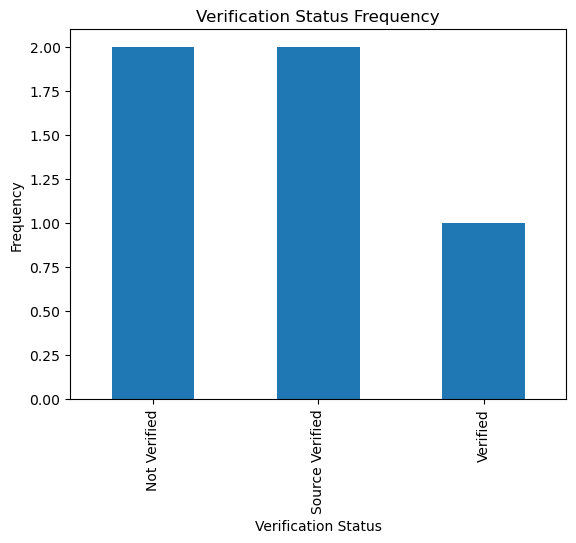

In [7]:
import matplotlib.pyplot as plt

# Bar chart for verification status
df['verification_status'].value_counts().plot(kind='bar')
plt.title('Verification Status Frequency')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.show()


In [3]:
from sklearn.calibration import calibration_curve

C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Validation Brier Score: 0.2252351751210613
Validation Log Loss: 0.6428361555473544
Validation ROC AUC Score: 0.6732145384732184


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Brier Score: 0.22376724398755235
Test Log Loss: 0.6378405189026519
Test ROC AUC Score: 0.6829826029300329


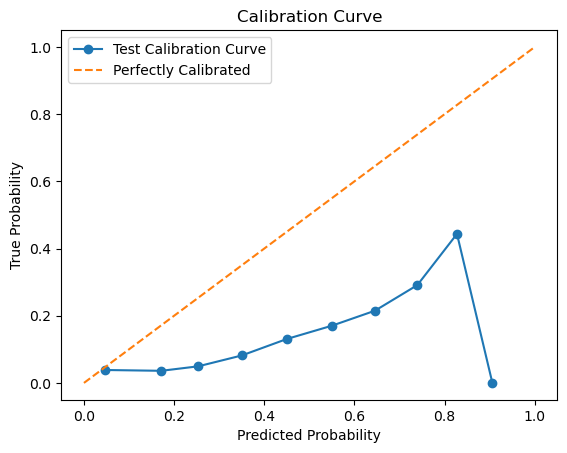

Feature Coefficients:
                                Feature  Coefficient
2                              int_rate     0.146995
0                        inq_last_6mths     0.053206
1                                  term     0.010710
21                              pub_rec     0.007228
16                             open_acc     0.004425
7                            revol_util     0.002309
14                credit_history_length     0.000735
6                             revol_bal     0.000002
3                            annual_inc    -0.000005
9                           installment    -0.000290
5                       fico_range_mean    -0.002683
4                            emp_length    -0.002789
11                                  dti    -0.002825
13                            total_acc    -0.010039
20                   home_ownership_OWN    -0.015282
19                  purpose_credit_card    -0.027573
15  verification_status_Source Verified    -0.041149
18         verification_

In [5]:
# simple logistic regression with sampling method - 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import calibration_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import pickle

# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Filter data for the desired years
filtered_data = data[data['issue_d'].dt.year.isin(range(2007, 2012))]

# Update list of columns to use based on the feature importance provided
columns = [
    "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc",  "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SMOTE and under-sampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Define pipeline with SMOTE, under-sampling, and logistic regression
pipeline = Pipeline([('smote', smote), ('under_sampler', under_sampler), ('logistic', LogisticRegression(max_iter=1000))])

# Initialize 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation predictions
y_pred_cv_prob = cross_val_predict(pipeline, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Evaluate the model performance on the validation set
brier_score_val = brier_score_loss(y_train, y_pred_cv_prob)
log_loss_val = log_loss(y_train, y_pred_cv_prob)
auc_score_val = roc_auc_score(y_train, y_pred_cv_prob)

print("Validation Brier Score:", brier_score_val)
print("Validation Log Loss:", log_loss_val)
print("Validation ROC AUC Score:", auc_score_val)

# Training the model on the entire training dataset
pipeline.fit(X_train, y_train)



# Predictions on the test set
y_pred_test_prob = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the performance on the test set
brier_score_test = brier_score_loss(y_test, y_pred_test_prob)
log_loss_test = log_loss(y_test, y_pred_test_prob)
auc_score_test = roc_auc_score(y_test, y_pred_test_prob)

print("Test Brier Score:", brier_score_test)
print("Test Log Loss:", log_loss_test)
print("Test ROC AUC Score:", auc_score_test)

# Calibration curve for the test set
prob_true, prob_pred = calibration_curve(y_test, y_pred_test_prob, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Test Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Feature importance is not directly applicable for logistic regression as in Random Forest,
# but we can still look at the coefficients
coefficients = pipeline.named_steps['logistic'].coef_[0]
feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Feature Coefficients:")
print(feature_importance_df)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Validation Brier Score: 0.11669383994619188
Validation Log Loss: 0.3872544348875811
Validation ROC AUC Score: 0.6777155167422002
Test Brier Score: 0.11334733953728049
Test Log Loss: 0.3771076050067589
Test ROC AUC Score: 0.6899956323145575


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


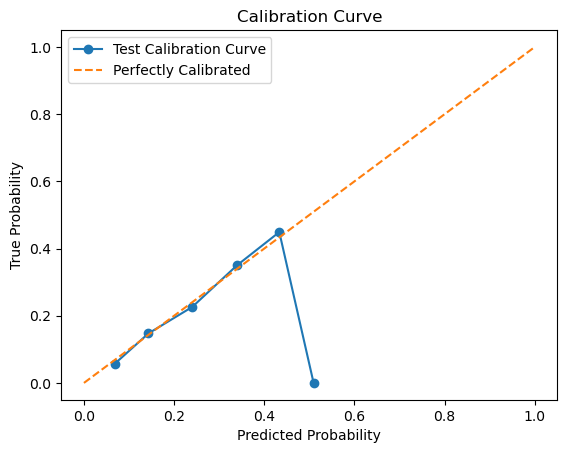

Feature Coefficients:
                                Feature  Coefficient
2                              int_rate     0.093945
0                        inq_last_6mths     0.037029
1                                  term     0.022125
16                             open_acc     0.004338
21                              pub_rec     0.004172
12                  home_ownership_RENT     0.001585
18         verification_status_Verified     0.001297
14                credit_history_length     0.000783
7                            revol_util     0.000741
4                            emp_length     0.000660
20                   home_ownership_OWN     0.000182
9                           installment     0.000132
6                             revol_bal     0.000002
3                            annual_inc    -0.000007
15  verification_status_Source Verified    -0.000277
10     verification_status_Not Verified    -0.000354
8               home_ownership_MORTGAGE    -0.001387
17           purpose_deb

In [6]:
# simple logistic regression without sampling 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import pickle

# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Filter data for the desired years
filtered_data = data[data['issue_d'].dt.year.isin(range(2007, 2012))]

# Update list of columns to use based on the feature importance provided
columns = [
    "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc",  "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define logistic regression without sampling
logistic = LogisticRegression(max_iter=1000)

# Initialize 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation predictions without using sampling techniques
y_pred_cv_prob = cross_val_predict(logistic, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Evaluate the model performance on the validation set
brier_score_val = brier_score_loss(y_train, y_pred_cv_prob)
log_loss_val = log_loss(y_train, y_pred_cv_prob)
auc_score_val = roc_auc_score(y_train, y_pred_cv_prob)

print("Validation Brier Score:", brier_score_val)
print("Validation Log Loss:", log_loss_val)
print("Validation ROC AUC Score:", auc_score_val)

# Training the model on the entire training dataset without sampling
logistic.fit(X_train, y_train)


# Predictions on the test set
y_pred_test_prob = logistic.predict_proba(X_test)[:, 1]

# Evaluate the performance on the test set
brier_score_test = brier_score_loss(y_test, y_pred_test_prob)
log_loss_test = log_loss(y_test, y_pred_test_prob)
auc_score_test = roc_auc_score(y_test, y_pred_test_prob)

print("Test Brier Score:", brier_score_test)
print("Test Log Loss:", log_loss_test)
print("Test ROC AUC Score:", auc_score_test)

# Calibration curve for the test set
prob_true, prob_pred = calibration_curve(y_test, y_pred_test_prob, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Test Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Feature importance is not directly applicable for logistic regression as in Random Forest,
# but we can still look at the coefficients
coefficients = logistic.coef_[0]
feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Feature Coefficients:")
print(feature_importance_df)



Best hyperparameters found: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Validation Brier Score: 0.12407244905420105
Validation Log Loss: 0.41997119575761405
Validation ROC AUC Score: 0.5668392631038502
Test Brier Score: 0.12162852925093186
Test Log Loss: 0.41206373265278257
Test ROC AUC Score: 0.5650744348320283


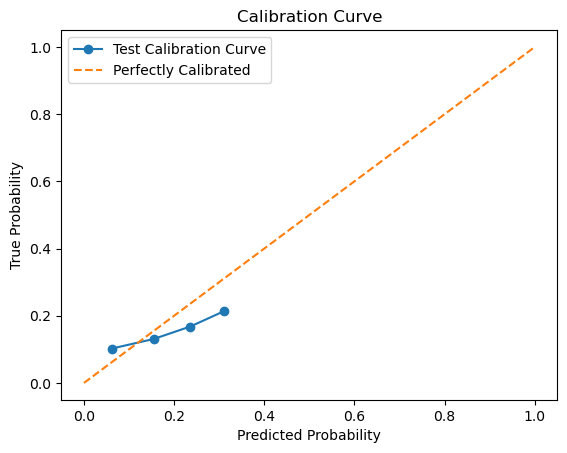

In [7]:
# logistic regression with hyper tuning without sampling 
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import pickle

# Convert 'issue_d' column to datetime if not already done
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Filter data for the desired years
filtered_data = data[data['issue_d'].dt.year.isin(range(2007, 2012))]

# Define the columns based on feature importance
columns = [
    "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc",  "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1'],  # Specifies L1 regularization (Lasso)
    'solver': ['saga']  # Solver that supports the L1 penalty
}

# Setup GridSearchCV with 'neg_brier_score' for scoring
logistic = LogisticRegression(max_iter=10000, random_state=42)
grid_simple = GridSearchCV(logistic, param_grid, cv=cv, scoring='neg_brier_score', return_train_score=True)
grid_simple.fit(X_train, y_train)

# Output the best hyperparameters
print("Best hyperparameters found:", grid_simple.best_params_)

# Validation metrics using the best model found in grid search
best_model = grid_simple.best_estimator_

# Predictions on the validation set (cross-validation)
y_pred_val_prob = cross_val_predict(best_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Evaluate the model performance on the validation set
brier_score_val = brier_score_loss(y_train, y_pred_val_prob)
log_loss_val = log_loss(y_train, y_pred_val_prob)
auc_score_val = roc_auc_score(y_train, y_pred_val_prob)

print("Validation Brier Score:", brier_score_val)
print("Validation Log Loss:", log_loss_val)
print("Validation ROC AUC Score:", auc_score_val)

# Train the model on the entire training dataset
best_model.fit(X_train, y_train)


# Predictions on the test set
y_pred_test_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate the performance on the test set
brier_score_test = brier_score_loss(y_test, y_pred_test_prob)
log_loss_test = log_loss(y_test, y_pred_test_prob)
auc_score_test = roc_auc_score(y_test, y_pred_test_prob)

print("Test Brier Score:", brier_score_test)
print("Test Log Loss:", log_loss_test)
print("Test ROC AUC Score:", auc_score_test)

# Calibration curve for the test set
prob_true, prob_pred = calibration_curve(y_test, y_pred_test_prob, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Test Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()


Best hyperparameters found: {'logistic__C': 0.01, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}
Validation Brier Score: 0.24467470204343394
Validation Log Loss: 0.6824291181345051
Validation ROC AUC Score: 0.5748639157395469
Test Brier Score: 0.24367853964302225
Test Log Loss: 0.6800812278604031
Test ROC AUC Score: 0.5880843752631135


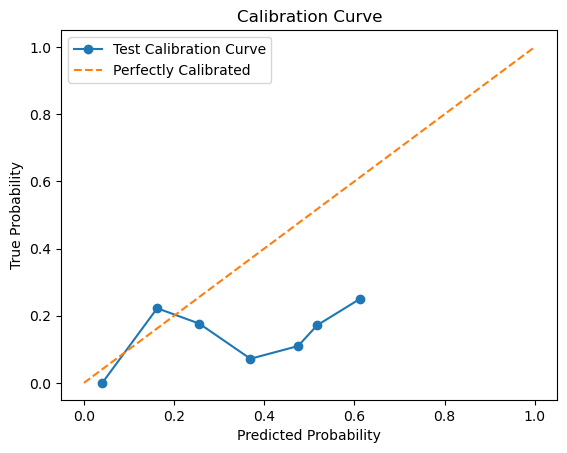

In [8]:
# logistic regression with hyper tuning with sampling 
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import calibration_curve
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import pickle


# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Filter data for the desired years
filtered_data = data[data['issue_d'].dt.year.isin(range(2007, 2012))]

# Define the columns based on feature importance
columns = [
    "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid for Logistic Regression
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logistic__penalty': ['l1'],  # Lasso
    'logistic__solver': ['saga']  # Solver that supports L1 penalty
}

# Define pipeline with SMOTE, under-sampling, and logistic regression
pipeline = ImPipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('under_sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('logistic', LogisticRegression(max_iter=10000, random_state=42))
])

# Setup GridSearchCV with the sampling pipeline and using 'neg_brier_score' for scoring
grid_sampling = GridSearchCV(pipeline, param_grid, cv=cv, scoring='neg_brier_score', return_train_score=True)
grid_sampling.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found:", grid_sampling.best_params_)

# Validation metrics using the best model found in grid search
best_model = grid_sampling.best_estimator_

# Predictions on the validation set (cross-validation)
y_pred_val_prob = cross_val_predict(best_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Evaluate the model performance on the validation set
brier_score_val = brier_score_loss(y_train, y_pred_val_prob)
log_loss_val = log_loss(y_train, y_pred_val_prob)
auc_score_val = roc_auc_score(y_train, y_pred_val_prob)

print("Validation Brier Score:", brier_score_val)
print("Validation Log Loss:", log_loss_val)
print("Validation ROC AUC Score:", auc_score_val)

# Train the model on the entire training dataset
best_model.fit(X_train, y_train)


# Predictions on the test set
y_pred_test_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate the performance on the test set
brier_score_test = brier_score_loss(y_test, y_pred_test_prob)
log_loss_test = log_loss(y_test, y_pred_test_prob)
auc_score_test = roc_auc_score(y_test, y_pred_test_prob)

print("Test Brier Score:", brier_score_test)
print("Test Log Loss:", log_loss_test)
print("Test ROC AUC Score:", auc_score_test)

# Calibration curve for the test set
prob_true, prob_pred = calibration_curve(y_test, y_pred_test_prob, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Test Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()


Validation Brier Score: 0.11774590612039713
Validation Log Loss: 0.39629838983758553
Validation ROC AUC Score: 0.6737009828048558
Test Brier Score: 0.11443007036943956
Test Log Loss: 0.38333417718117657
Test ROC AUC Score: 0.6817065020628105


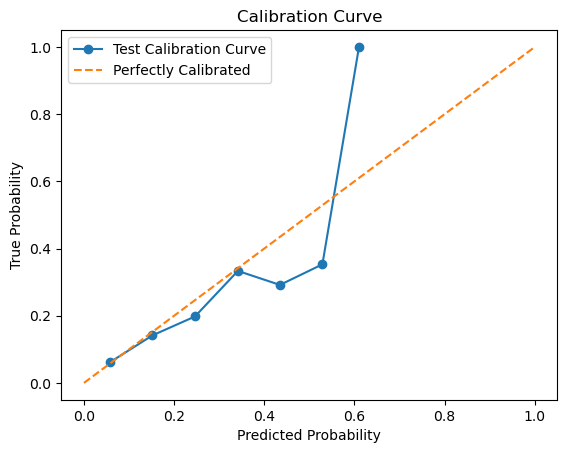

Feature Importances:
                                Feature  Importance
2                              int_rate    0.096807
3                            annual_inc    0.091019
9                           installment    0.090305
6                             revol_bal    0.089089
7                            revol_util    0.089086
11                                  dti    0.088347
14                credit_history_length    0.087747
13                            total_acc    0.071315
5                       fico_range_mean    0.059857
16                             open_acc    0.056544
4                            emp_length    0.050025
0                        inq_last_6mths    0.029420
1                                  term    0.016068
17           purpose_debt_consolidation    0.013384
12                  home_ownership_RENT    0.010653
8               home_ownership_MORTGAGE    0.010193
18         verification_status_Verified    0.010110
10     verification_status_Not Verified    

In [9]:
# simple random forest without sampling
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt


# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Filter data for the desired years
filtered_data = data[data['issue_d'].dt.year.isin(range(2007, 2012))]

# Update list of columns to use based on the feature importance provided
columns = [
    "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc","credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define random forest classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation predictions
y_pred_val_prob = cross_val_predict(forest, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Evaluate the model performance on the validation set
brier_score_val = brier_score_loss(y_train, y_pred_val_prob)
log_loss_val = log_loss(y_train, y_pred_val_prob)
auc_score_val = roc_auc_score(y_train, y_pred_val_prob)

print("Validation Brier Score:", brier_score_val)
print("Validation Log Loss:", log_loss_val)
print("Validation ROC AUC Score:", auc_score_val)

# Train the model on the entire training dataset
forest.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_prob = forest.predict_proba(X_test)[:, 1]

# Evaluate the performance on the test set
brier_score_test = brier_score_loss(y_test, y_pred_test_prob)
log_loss_test = log_loss(y_test, y_pred_test_prob)
auc_score_test = roc_auc_score(y_test, y_pred_test_prob)

print("Test Brier Score:", brier_score_test)
print("Test Log Loss:", log_loss_test)
print("Test ROC AUC Score:", auc_score_test)

# Calibration curve for the test set
prob_true, prob_pred = calibration_curve(y_test, y_pred_test_prob, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Test Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Feature importance
feature_importances = forest.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


Validation Brier Score: 0.1224669096393113
Validation Log Loss: 0.40388668585286813
Validation ROC AUC Score: 0.667465760585636
Test Brier Score: 0.11943079919577783
Test Log Loss: 0.39664622851141096
Test ROC AUC Score: 0.6758514355476971


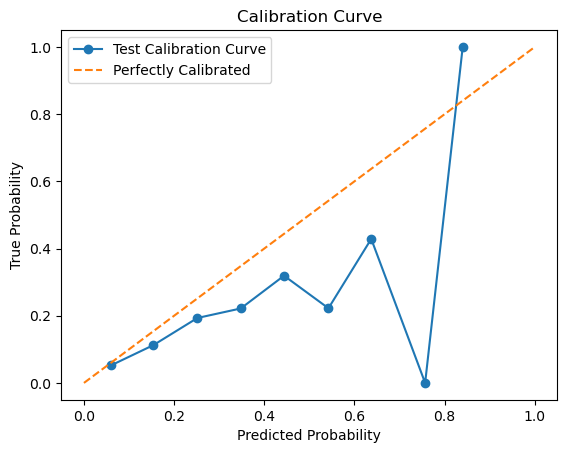

NameError: name 'roc_curve' is not defined

In [ ]:
# simple random forest with sampling 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import calibration_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Filter data for the desired years
filtered_data = data[data['issue_d'].dt.year.isin(range(2007, 2012))]

# Update list of columns to use based on the feature importance provided
columns = [
    "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SMOTE and under-sampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Define pipeline with SMOTE, under-sampling, and random forest
pipeline = Pipeline([
    ('smote', smote),
    ('under_sampler', under_sampler),
    ('forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Initialize 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation predictions
y_pred_val_prob = cross_val_predict(pipeline, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Evaluate the model performance on the validation set
brier_score_val = brier_score_loss(y_train, y_pred_val_prob)
log_loss_val = log_loss(y_train, y_pred_val_prob)
auc_score_val = roc_auc_score(y_train, y_pred_val_prob)

print("Validation Brier Score:", brier_score_val)
print("Validation Log Loss:", log_loss_val)
print("Validation ROC AUC Score:", auc_score_val)

# Training the model on the entire training dataset
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_prob = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the performance on the test set
brier_score_test = brier_score_loss(y_test, y_pred_test_prob)
log_loss_test = log_loss(y_test, y_pred_test_prob)
auc_score_test = roc_auc_score(y_test, y_pred_test_prob)

print("Test Brier Score:", brier_score_test)
print("Test Log Loss:", log_loss_test)
print("Test ROC AUC Score:", auc_score_test)

# Calibration curve for the test set
prob_true, prob_pred = calibration_curve(y_test, y_pred_test_prob, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Test Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % auc_score_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature importance
feature_importances = pipeline.named_steps['forest'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.8s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier_

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassif

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=   0.1s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=   0.1s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=   0.1s
[CV] END randomforestclassifier_

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=   0.1s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier_

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  13.6s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  13.5s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  13.6s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  13.8s
[CV] END randomforestclassifier_

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  25.9s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  26.3s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  25.7s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  26.2s
[CV] END randomforestclassif

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  26.5s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  39.0s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  54.6s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  50.5s
[CV] END randomforestclassifier_

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  37.9s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  44.0s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=  14.9s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=  15.8s
[CV] END randomforestclassifier_

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  13.4s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  13.5s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  13.4s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  27.2s
[CV] END randomforestclassifier_

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  26.8s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  26.1s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  25.9s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  25.6s
[CV] END randomforestclassif

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  38.8s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  39.7s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  39.7s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  38.6s
[CV] END randomforestclassifier_

[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  39.1s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=  17.6s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=  13.3s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=  12.6s
[CV] END randomforestclassifier_

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=   0.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=   0.1s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=   0.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=   0.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=   0.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=   0.1s
[CV] END randomforestclassifier__max

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=   0.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=   0.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   0.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   0.1s
[CV] END randomforestclassifier__max_d

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  19.0s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  21.3s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  32.8s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  39.4s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  28.7s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  28.9s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   9.6s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   9.5s
[CV] END randomforestclassifier__max_d

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   9.7s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   9.8s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  19.7s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  20.0s
[CV] END randomforestclassifier__max

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  19.0s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  18.9s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  28.6s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  28.3s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  21.3s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  22.3s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   6.7s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   5.9s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   7.4s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   7.3s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  13.4s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  12.6s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  14.2s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  13.9s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  24.1s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  24.1s
[CV] END randomforestclassifier__max

[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  24.6s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  29.0s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=  12.5s
[CV] END randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=  16.1s
[CV] END randomforestclassifier__max_d

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=   0.3s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=   0.4s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=   0.2s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=   0.3s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=   0.3s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_d

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  24.4s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  20.8s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  39.5s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  34.2s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  34.4s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  38.9s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=  13.5s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=  11.5s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  10.8s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  10.7s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  25.6s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  27.6s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  27.9s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  29.3s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  42.7s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  40.2s
[CV] END randomforestclassifier__max

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  41.8s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  41.7s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=  13.8s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=  12.9s
[CV] END randomforestclassifier__max_d

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=  13.1s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=  12.4s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  26.8s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  26.8s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  37.8s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  43.8s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time= 1.0min
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  43.7s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  41.7s
[CV] END randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  38.8s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_d

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=   0.2s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=   0.2s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  14.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  14.2s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  28.5s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  28.4s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  20.0s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  20.1s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  25.0s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  23.5s
[CV] END randomforestclassifier__max

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  30.7s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  28.4s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=  11.0s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   8.2s
[CV] END randomforestclassifier__max_d

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   8.1s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100; total time=   8.6s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  18.7s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  19.7s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  16.8s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=200; total time=  17.4s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  28.7s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=300; total time=  31.7s
[CV] END randomforestclassifier__max_dep

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  26.7s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=300; total time=  28.4s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  11.1s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=  10.0s
[CV] END randomforestclassifier__max_d

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   8.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=100; total time=   7.7s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  15.9s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time=  15.8s
[CV] END randomforestclassifier__max

[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  17.2s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time=  18.7s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  30.6s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=300; total time=  27.3s
[CV] END randomforestclassifier__max_dep

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 326, in fit
    self._final_estimator.fi

Best hyperparameters found: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 300}
Test Brier Score: 0.11841909122374458
Validation Brier Score: 0.12124843686794465
Test Log Loss: 0.39028988991407165
Validation Log Loss: 0.39722295218248566
Test ROC AUC Score: 0.6807104198240296


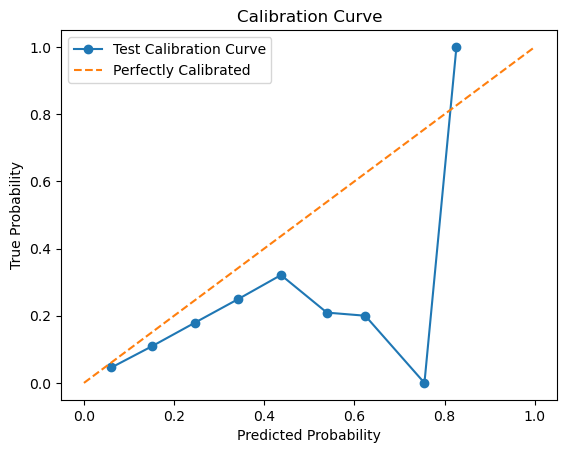

Feature Importances:
                                Feature  Importance
1                                  term    0.136566
0                        inq_last_6mths    0.122814
2                              int_rate    0.070624
10     verification_status_Not Verified    0.054637
18         verification_status_Verified    0.053372
15  verification_status_Source Verified    0.052475
3                            annual_inc    0.045249
5                       fico_range_mean    0.044603
12                  home_ownership_RENT    0.038406
8               home_ownership_MORTGAGE    0.038086
6                             revol_bal    0.036779
7                            revol_util    0.036429
4                            emp_length    0.036380
9                           installment    0.035323
11                                  dti    0.032923
14                credit_history_length    0.032817
13                            total_acc    0.028921
16                             open_acc    

In [4]:
# random forest with hyper tuning with sampling 
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import calibration_curve
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import pickle




# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Filter data for the desired years
filtered_data = data[data['issue_d'].dt.year.isin(range(2007, 2012))]

# Define the columns based on feature importance
columns = [
     "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Define pipeline with SMOTE, under-sampling, and Random Forest
pipeline = ImPipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('under_sampler', RandomUnderSampler(sampling_strategy='auto', random_state=42)),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# Setup GridSearchCV with the pipeline and using 'neg_brier_score' for scoring
grid_sampling = GridSearchCV(pipeline, param_grid, cv=cv, scoring='neg_brier_score', verbose=2)
grid_sampling.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found:", grid_sampling.best_params_)

# Using the best estimator directly from the grid search
best_model_rf1 = grid_sampling.best_estimator_

# Save the best model
with open('best_model_rf1.pkl', 'wb') as model_file:
    pickle.dump(best_model_rf1, model_file)

# Predictions on the test set
y_pred_test_prob = best_model_rf1.predict_proba(X_test)[:, 1]

# Predictions on the validation set (cross-validation)
y_pred_val_prob = cross_val_predict(best_model_rf1, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Evaluate the Brier score on the test set
brier_score_test = brier_score_loss(y_test, y_pred_test_prob)
print("Test Brier Score:", brier_score_test)

# Evaluate the Brier score on the validation set
brier_score_val = brier_score_loss(y_train, y_pred_val_prob)
print("Validation Brier Score:", brier_score_val)

# Evaluate the Log Loss on the test set
log_loss_test = log_loss(y_test, y_pred_test_prob)
print("Test Log Loss:", log_loss_test)

# Evaluate the Log Loss on the validation set
log_loss_val = log_loss(y_train, y_pred_val_prob)
print("Validation Log Loss:", log_loss_val)

# ROC AUC score for the test set
auc_score_test = roc_auc_score(y_test, y_pred_test_prob)
print("Test ROC AUC Score:", auc_score_test)

# Calibration curve for the test set
prob_true, prob_pred = calibration_curve(y_test, y_pred_test_prob, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Test Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Feature importance
feature_importances = best_model_rf1.named_steps['randomforestclassifier'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

C:\Users\user\AppData\Local\Temp\ipykernel_9544\2722302138.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_new['pred_prob'] = y_pred_new_prob
C:\Users\user\AppData\Local\Temp\ipykernel_9544\2722302138.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_new['pred_class'] = y_pred_new_class


New Data Brier Score: 0.1514476391778979
New Data Log Loss: 0.4722918784190247
New Data ROC AUC Score: 0.6740199283555063


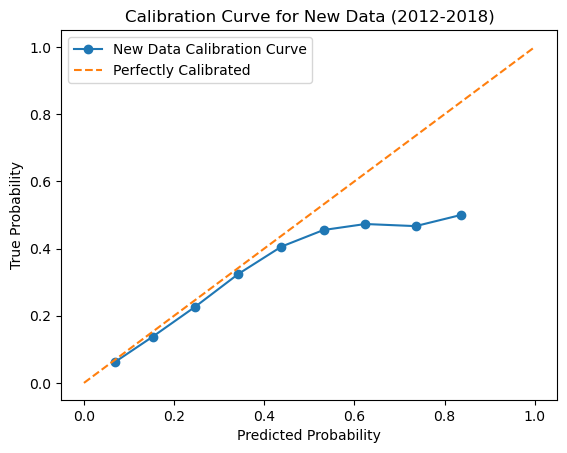

Feature Importances:
                                Feature  Importance
1                                  term    0.136566
0                        inq_last_6mths    0.122814
2                              int_rate    0.070624
10     verification_status_Not Verified    0.054637
18         verification_status_Verified    0.053372
15  verification_status_Source Verified    0.052475
3                            annual_inc    0.045249
5                       fico_range_mean    0.044603
12                  home_ownership_RENT    0.038406
8               home_ownership_MORTGAGE    0.038086
6                             revol_bal    0.036779
7                            revol_util    0.036429
4                            emp_length    0.036380
9                           installment    0.035323
11                                  dti    0.032923
14                credit_history_length    0.032817
13                            total_acc    0.028921
16                             open_acc    

In [5]:
# Step 1: Load the best model from the saved file
with open('best_model_rf1.pkl', 'rb') as model_file:
    best_model_rf1 = pickle.load(model_file)

# Step 2: Filter the dataset for the new date range (2012-2018)
filtered_data_new = data[data['issue_d'].dt.year.isin(range(2012, 2019))]

# Selecting features and target for the new subset
X_new = filtered_data_new[columns]
y_new = filtered_data_new['loan_status']

# Step 3: Use the model to predict probabilities and classes on the new subset
y_pred_new_prob = best_model_rf1.predict_proba(X_new)[:, 1]
y_pred_new_class = best_model_rf1.predict(X_new)

# Add predictions to the original dataset
filtered_data_new['pred_prob'] = y_pred_new_prob
filtered_data_new['pred_class'] = y_pred_new_class

# Save the new dataset with predictions
filtered_data_new.to_csv('predicted_data_2012_2018.csv', index=False)

# Step 4: Evaluate the model's performance on the new subset
brier_score_new = brier_score_loss(y_new, y_pred_new_prob)
log_loss_new = log_loss(y_new, y_pred_new_prob)
auc_score_new = roc_auc_score(y_new, y_pred_new_prob)

print("New Data Brier Score:", brier_score_new)
print("New Data Log Loss:", log_loss_new)
print("New Data ROC AUC Score:", auc_score_new)

# Step 5: Generate the calibration curve for the new subset
prob_true_new, prob_pred_new = calibration_curve(y_new, y_pred_new_prob, n_bins=10)

plt.figure()
plt.plot(prob_pred_new, prob_true_new, marker='o', label='New Data Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve for New Data (2012-2018)')
plt.legend()
plt.show()

# Feature importance (already printed, but reprinting for clarity)
feature_importances = best_model_rf1.named_steps['randomforestclassifier'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


In [6]:
filtered_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305524 entries, 0 to 1345309
Data columns (total 71 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   id                                   1305524 non-null  int64         
 1   loan_amnt                            1305524 non-null  float64       
 2   term                                 1305524 non-null  int64         
 3   int_rate                             1305524 non-null  float64       
 4   installment                          1305524 non-null  float64       
 5   grade                                1305524 non-null  object        
 6   sub_grade                            1305524 non-null  int64         
 7   emp_length                           1305524 non-null  float64       
 8   annual_inc                           1305524 non-null  float64       
 9   issue_d                              1305524 non-null  datetim

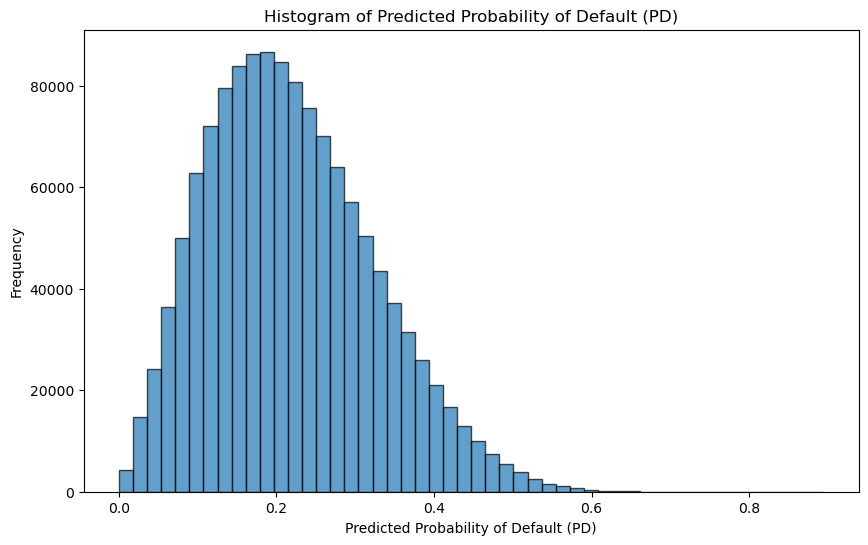

Average Probability of Default (PD) for the whole dataset: 0.21867763451631486
Average Probability of Default (PD) by Grade:
  Grade  Average_PD
0     A    0.110142
1     B    0.179098
2     C    0.236450
3     D    0.293897
4     E    0.346115
5     F    0.380960
6     G    0.392655


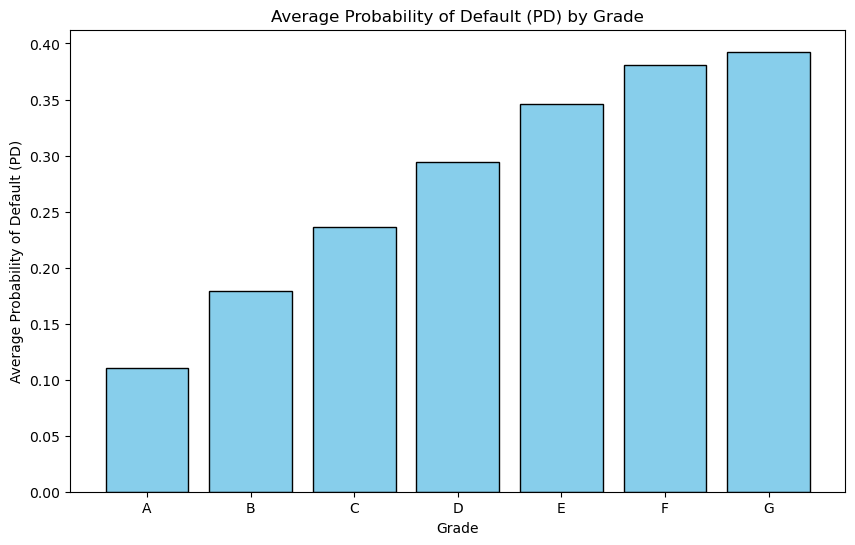

In [8]:
import matplotlib.pyplot as plt

# Generate a histogram of the pred_prob column
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_new['pred_prob'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Probability of Default (PD)')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probability of Default (PD)')
plt.show()

# Calculate the average PD for the whole dataset
average_pd = filtered_data_new['pred_prob'].mean()
print("Average Probability of Default (PD) for the whole dataset:", average_pd)

# Calculate the average PD based on the grade
average_pd_by_grade = filtered_data_new.groupby('grade')['pred_prob'].mean().reset_index()
average_pd_by_grade.columns = ['Grade', 'Average_PD']
print("Average Probability of Default (PD) by Grade:")
print(average_pd_by_grade)

# Plot the average PD by grade
plt.figure(figsize=(10, 6))
plt.bar(average_pd_by_grade['Grade'], average_pd_by_grade['Average_PD'], color='skyblue', edgecolor='k')
plt.xlabel('Grade')
plt.ylabel('Average Probability of Default (PD)')
plt.title('Average Probability of Default (PD) by Grade')
plt.show()


In [9]:
# Export the dataset to a CSV file
filtered_data_new.to_csv('uncon_pd_group1_final.csv', index=False)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  11.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  11.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  11.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  10.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  10.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   6.8s
[CV] END max_depth

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   8.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   8.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   8.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  12.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  12.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  12.3s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  11.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  11.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   7.8s
[CV] END max_depth

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   7.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   8.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=sq

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.2s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.8s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   9.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  14.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  15.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  14.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  12.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  12.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=20, max_features=sq

[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  13.6s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  12.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  14.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  17.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=20, max_features

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=a

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=30, max_features=sq

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  13.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  15.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  13.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  12.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  12.5s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.4s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  13.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  15.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  18.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  16.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  14.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.7s
[CV] END max_depth=30, max_features=l

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-packages\s

Best hyperparameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Test Brier Score: 0.11271795091577058
Validation Brier Score: 0.11587688052239986
Test Log Loss: 0.3736718176139135
Validation Log Loss: 0.3826788426803396
Test ROC AUC Score: 0.700778816199377


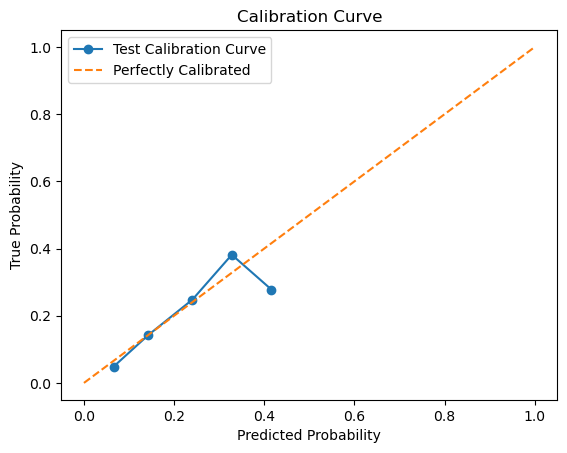

Feature Importances:
                                Feature  Importance
2                              int_rate    0.178149
3                            annual_inc    0.095753
7                            revol_util    0.079397
1                                  term    0.076525
9                           installment    0.073745
5                       fico_range_mean    0.072152
6                             revol_bal    0.067616
14                credit_history_length    0.066921
11                                  dti    0.065151
13                            total_acc    0.051397
16                             open_acc    0.038338
4                            emp_length    0.035783
0                        inq_last_6mths    0.035257
21                              pub_rec    0.010864
17           purpose_debt_consolidation    0.008013
18         verification_status_Verified    0.007285
12                  home_ownership_RENT    0.007204
10     verification_status_Not Verified    

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset

# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Filter data for the desired years
filtered_data = data[data['issue_d'].dt.year.isin(range(2007, 2012))]

# Define the columns based on feature importance
columns = [
     "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the Random Forest classifier
forest = RandomForestClassifier(random_state=42)

# Setup GridSearchCV with the Random Forest classifier using 'neg_brier_score' for scoring
grid_search = GridSearchCV(forest, param_grid, cv=cv, scoring='neg_brier_score', verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found:", grid_search.best_params_)

# Using the best estimator directly from the grid search
best_forest = grid_search.best_estimator_

# Predictions on the test set
y_pred_test_prob = best_forest.predict_proba(X_test)[:, 1]

# Predictions on the validation set (cross-validation)
y_pred_val_prob = cross_val_predict(best_forest, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Evaluate the Brier score on the test set
brier_score_test = brier_score_loss(y_test, y_pred_test_prob)
print("Test Brier Score:", brier_score_test)

# Evaluate the Brier score on the validation set
brier_score_val = brier_score_loss(y_train, y_pred_val_prob)
print("Validation Brier Score:", brier_score_val)

# Evaluate the Log Loss on the test set
log_loss_test = log_loss(y_test, y_pred_test_prob)
print("Test Log Loss:", log_loss_test)

# Evaluate the Log Loss on the validation set
log_loss_val = log_loss(y_train, y_pred_val_prob)
print("Validation Log Loss:", log_loss_val)

# ROC AUC score for the test set
auc_score_test = roc_auc_score(y_test, y_pred_test_prob)
print("Test ROC AUC Score:", auc_score_test)

# Calibration curve for the test set
prob_true, prob_pred = calibration_curve(y_test, y_pred_test_prob, n_bins=10)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Test Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Feature importance
feature_importances = best_forest.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


In [16]:
# Calculate ROC AUC score for the validation set
auc_score_val = roc_auc_score(y_train, y_pred_val_prob)
print("Validation ROC AUC Score:", auc_score_val)


Validation ROC AUC Score: 0.689248603529875
